# Dimension Reduction

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
orginal_data = pd.read_csv('Dataset/accident_dataset.csv')
orginal_data.head(5)

,Country,State,Year,City name,Type of impacting vehicles or objects,Number of road accidents,Number of persons killed in road accidents,Number of grievously injured persons,Number of minor injured persons
0,India,Jharkhand,"Financial Year (Apr - Mar), 2021",Dhanbad,Others,0,0.0,0.0,0.0
1,India,Andhra Pradesh,"Financial Year (Apr - Mar), 2020",Vijaywada city,Bicycles,38,16.0,8.0,19.0
2,India,Gujarat,"Financial Year (Apr - Mar), 2020",Vadodra,Bicycles,19,5.0,10.0,5.0
3,India,Andhra Pradesh,"Financial Year (Apr - Mar), 2021",Vizag,Auto Rickshaws,74,10.0,46.0,46.0
4,India,Bihar,"Financial Year (Apr - Mar), 2020",Patna,Pedestrian,80,52.0,68.0,3.0


In [3]:
state_accident_sum = orginal_data.groupby('State')['Number of road accidents'].sum()
orginal_data['Total Accidents'] = orginal_data['State'].map(state_accident_sum)
orginal_data.head(5)

,Country,State,Year,City name,Type of impacting vehicles or objects,Number of road accidents,Number of persons killed in road accidents,Number of grievously injured persons,Number of minor injured persons,Total Accidents
0,India,Jharkhand,"Financial Year (Apr - Mar), 2021",Dhanbad,Others,0,0.0,0.0,0.0,984
1,India,Andhra Pradesh,"Financial Year (Apr - Mar), 2020",Vijaywada city,Bicycles,38,16.0,8.0,19.0,9605
2,India,Gujarat,"Financial Year (Apr - Mar), 2020",Vadodra,Bicycles,19,5.0,10.0,5.0,9194
3,India,Andhra Pradesh,"Financial Year (Apr - Mar), 2021",Vizag,Auto Rickshaws,74,10.0,46.0,46.0,9605
4,India,Bihar,"Financial Year (Apr - Mar), 2020",Patna,Pedestrian,80,52.0,68.0,3.0,1281


In [4]:
import warnings
warnings.filterwarnings("ignore")
orginal_data['Year_int'] = orginal_data['Year'].str.extract(r'(\d{4})').astype(int)
orginal_data = orginal_data.drop(columns=['Year'])
orginal_data.head(5)

,Country,State,City name,Type of impacting vehicles or objects,Number of road accidents,Number of persons killed in road accidents,Number of grievously injured persons,Number of minor injured persons,Total Accidents,Year_int
0,India,Jharkhand,Dhanbad,Others,0,0.0,0.0,0.0,984,2021
1,India,Andhra Pradesh,Vijaywada city,Bicycles,38,16.0,8.0,19.0,9605,2020
2,India,Gujarat,Vadodra,Bicycles,19,5.0,10.0,5.0,9194,2020
3,India,Andhra Pradesh,Vizag,Auto Rickshaws,74,10.0,46.0,46.0,9605,2021
4,India,Bihar,Patna,Pedestrian,80,52.0,68.0,3.0,1281,2020


In [5]:
clean_data = pd.read_csv('Dataset/pre_processed_data.csv')
clean_data.head(5)

,Number of road accidents,Number of persons killed in road accidents,Number of grievously injured persons,Number of minor injured persons,Year_int,State_encoded,City_encoded,Vechile_impacted_encoded
0,-0.519831,-0.553056,-0.399422,-0.389094,1.224291,-0.568936,-0.866505,0.387155
1,-0.392220,-0.297388,-0.344933,-0.293462,0.000000,-2.183015,1.627624,-1.161465
2,-0.456026,-0.473160,-0.331311,-0.363928,0.000000,-1.174216,1.489061,-1.161465
3,-0.271325,-0.393263,-0.086111,-0.157564,1.224291,-2.183015,1.696905,-1.548619
4,-0.251175,0.277867,0.063734,-0.373994,0.000000,-1.981255,0.865529,0.774310


### Applying PCA

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#df = pd.DataFrame(data)

# Standardize the data (mean=0 and variance=1)
#scaler = StandardScaler()
#df_scaled = scaler.fit_transform(clean_data)

# Apply PCA
pca = PCA()
pca.fit(clean_data)

# Calculate the cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Find the number of components to retain 80% of the information
num_components_80_percent = sum(cumulative_variance < 0.65) + 1

num_components_interest = 3

print(f"Number of components to retain 65% of the information: {num_components_80_percent}")
print(f"Cumulative Explained Variance for the First 2 Components: {cumulative_variance[1]:.2%}")
print(f"Cumulative Explained Variance for the First {num_components_interest} Components: {cumulative_variance[num_components_interest - 1]:.2%}")

Number of components to retain 65% of the information: 3
Cumulative Explained Variance for the First 2 Components: 57.46%
Cumulative Explained Variance for the First 3 Components: 69.97%


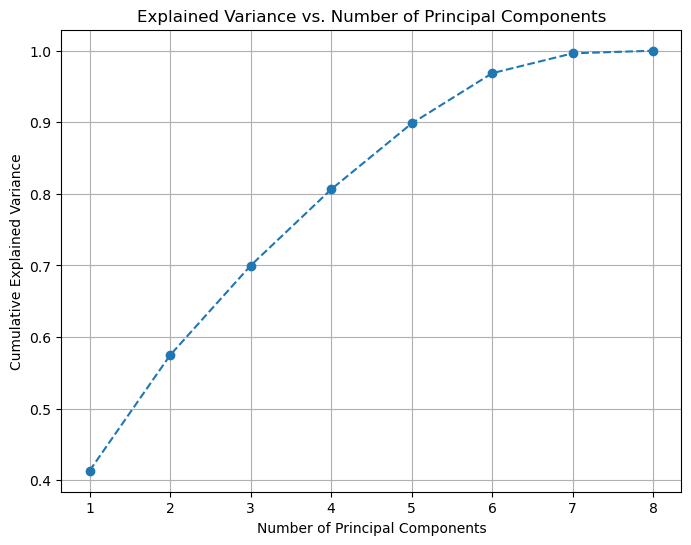

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

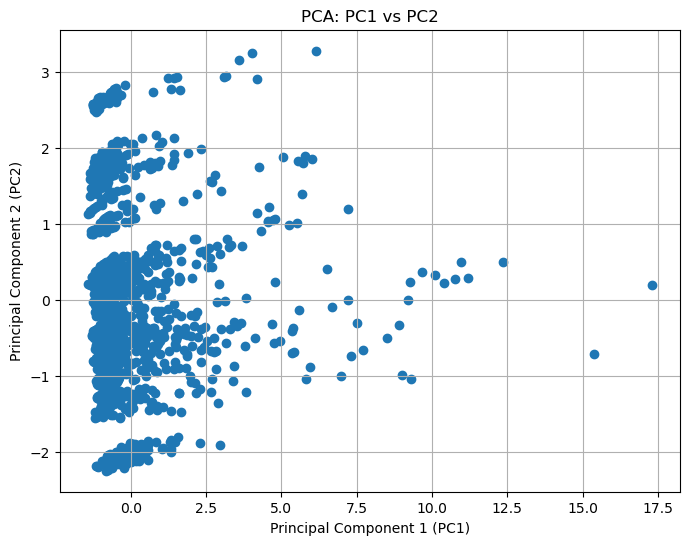

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(result_df['PC1'], result_df['PC2'])
plt.title('PCA: PC1 vs PC2')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.show()

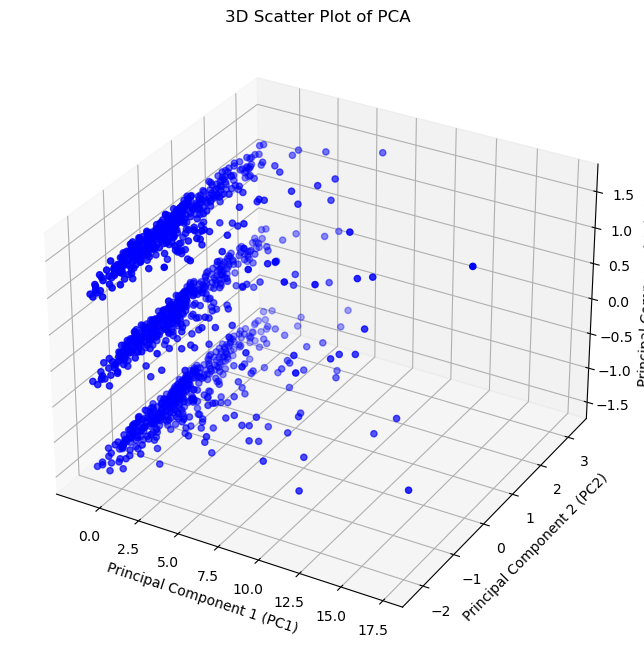

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module


# Apply PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(clean_data)

# Create a new DataFrame with the principal components
columns = [f'PC{i+1}' for i in range(3)]
df_pca = pd.DataFrame(data=principal_components, columns=columns)

# Plot 3D graph
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c='b', marker='o')

# Set labels
ax.set_xlabel('Principal Component 1 (PC1)')
ax.set_ylabel('Principal Component 2 (PC2)')
ax.set_zlabel('Principal Component 3 (PC3)')

# Set title
ax.set_title('3D Scatter Plot of PCA')

plt.show()

### Applying Tsne

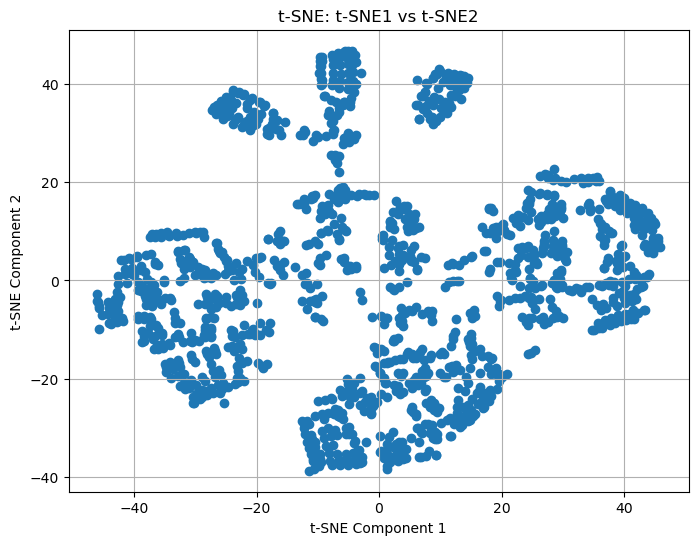

In [24]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(clean_data)

# Create a DataFrame with the t-SNE components
df_tsne = pd.DataFrame(data=tsne_result, columns=['t-SNE1', 't-SNE2'])

# Concatenate the original DataFrame and the t-SNE DataFrame
result_df_tsne = pd.concat([clean_data, df_tsne], axis=1)

# Plot the t-SNE components
plt.figure(figsize=(8, 6))
plt.scatter(result_df_tsne['t-SNE1'], result_df_tsne['t-SNE2'])
plt.title('t-SNE: t-SNE1 vs t-SNE2')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


In [44]:
result_df_tsne.head(5)

,Number of road accidents,Number of persons killed in road accidents,Number of grievously injured persons,Number of minor injured persons,Year_int,State_encoded,City_encoded,Vechile_impacted_encoded,t-SNE1,t-SNE2,t-SNE3
0,-0.519831,-0.553056,-0.399422,-0.389094,1.224291,-0.568936,-0.866505,0.387155,-1.136729,-3.181455,8.529530
1,-0.392220,-0.297388,-0.344933,-0.293462,0.000000,-2.183015,1.627624,-1.161465,-5.641398,9.115806,-0.073223
2,-0.456026,-0.473160,-0.331311,-0.363928,0.000000,-1.174216,1.489061,-1.161465,-7.454205,6.996981,-0.213411
3,-0.271325,-0.393263,-0.086111,-0.157564,1.224291,-2.183015,1.696905,-1.548619,-5.066470,9.681005,5.130285
4,-0.251175,0.277867,0.063734,-0.373994,0.000000,-1.981255,0.865529,0.774310,-1.662514,6.079912,0.067584


In [49]:
import plotly.express as px

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(clean_data)

# Create a DataFrame with the t-SNE components
df_tsne = pd.DataFrame(data=tsne_result, columns=['t-SNE1', 't-SNE2'])

# Concatenate the original DataFrame and the t-SNE DataFrame
result_df_tsne = pd.concat([clean_data, df_tsne], axis=1)

# Create an interactive scatter plot with hover annotations using plotly
fig = px.scatter(
    result_df_tsne, x='t-SNE1', y='t-SNE2',
    hover_data=clean_data.columns,
    color='City_encoded', # Columns to display on hover
    title='t-SNE: t-SNE1 vs t-SNE2',
    labels={'t-SNE1': 't-SNE Component 1', 't-SNE2': 't-SNE Component 2'}
)

# Show the plot
fig.show()


In [43]:
fig = px.scatter(
    result_df_tsne,
    x='t-SNE1',
    y='t-SNE2',
    hover_name = result_df_tsne['State_encoded'],
    color='City_encoded',
    title='Mean t-SNE Values by State (2D)',
    labels={'Component_1': 'Mean Component 1', 'Component_2': 'Mean Component 2'}
)

# Show the plot
fig.show()

In [41]:
fig = px.scatter(
    result_df_tsne,
    x='t-SNE1',
    y='t-SNE2',
    hover_name = result_df_tsne['State_encoded'],
    color='State_encoded',
    title='Mean t-SNE Values by State (2D)',
    labels={'Component_1': 'Mean Component 1', 'Component_2': 'Mean Component 2'}
)

# Show the plot
fig.show()

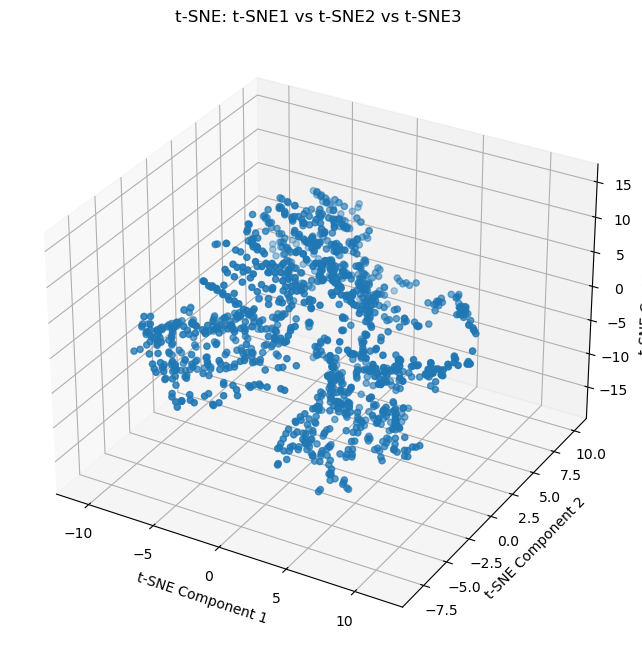

In [26]:
# Apply t-SNE with 3 components
tsne = TSNE(n_components=3, random_state=42)
tsne_result = tsne.fit_transform(clean_data)

# Create a DataFrame with the t-SNE components
df_tsne = pd.DataFrame(data=tsne_result, columns=['t-SNE1', 't-SNE2', 't-SNE3'])

# Concatenate the original DataFrame and the t-SNE DataFrame
result_df_tsne = pd.concat([clean_data, df_tsne], axis=1)

# Plot the t-SNE components in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result_df_tsne['t-SNE1'], result_df_tsne['t-SNE2'], result_df_tsne['t-SNE3'])

# Set labels
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')

# Set title
ax.set_title('t-SNE: t-SNE1 vs t-SNE2 vs t-SNE3')

plt.show()


### MDS

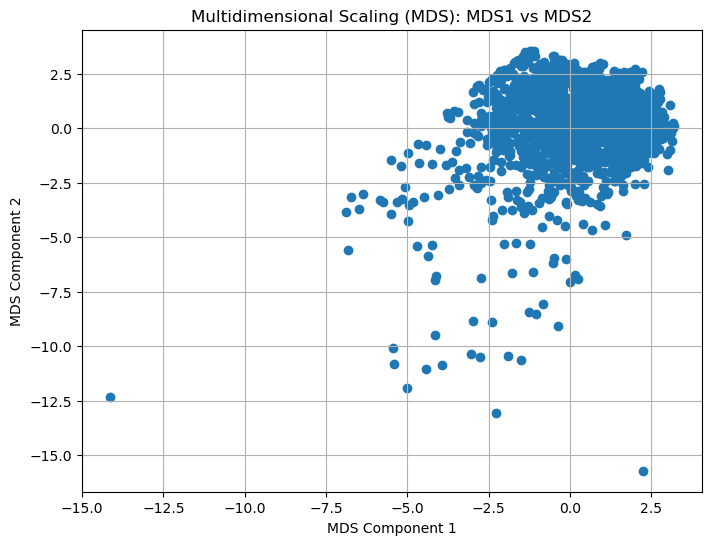

In [29]:
from sklearn.manifold import MDS




# Apply MDS
mds = MDS(n_components=2, random_state=42)
mds_result = mds.fit_transform(clean_data)

# Create a DataFrame with the MDS components
df_mds = pd.DataFrame(data=mds_result, columns=['MDS1', 'MDS2'])

# Concatenate the original DataFrame and the MDS DataFrame
result_df_mds = pd.concat([clean_data, df_mds], axis=1)

# Plot the MDS components
plt.figure(figsize=(8, 6))
plt.scatter(result_df_mds['MDS1'], result_df_mds['MDS2'])
plt.title('Multidimensional Scaling (MDS): MDS1 vs MDS2')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.grid(True)
plt.show()


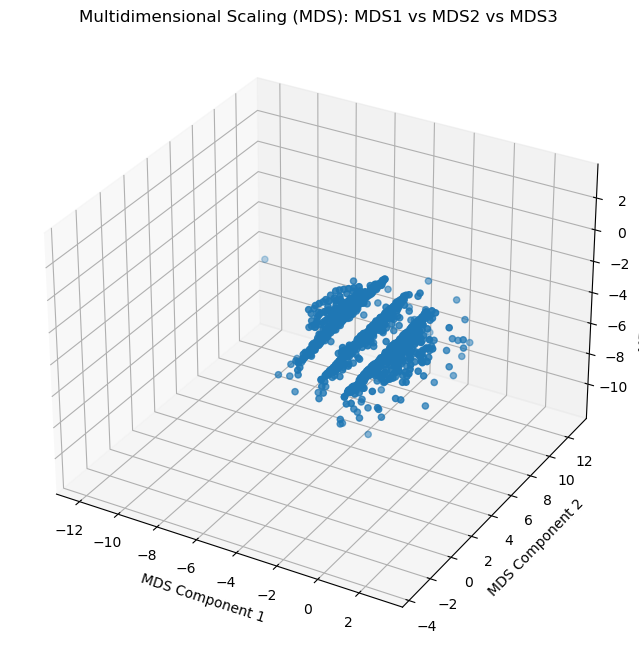

In [31]:
# Apply MDS with 3 components
mds = MDS(n_components=3, random_state=42)
mds_result = mds.fit_transform(clean_data)

# Create a DataFrame with the MDS components
df_mds = pd.DataFrame(data=mds_result, columns=['MDS1', 'MDS2', 'MDS3'])

# Concatenate the original DataFrame and the MDS DataFrame
result_df_mds = pd.concat([clean_data, df_mds], axis=1)

# Plot the MDS components in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result_df_mds['MDS1'], result_df_mds['MDS2'], result_df_mds['MDS3'])

# Set labels
ax.set_xlabel('MDS Component 1')
ax.set_ylabel('MDS Component 2')
ax.set_zlabel('MDS Component 3')

# Set title
ax.set_title('Multidimensional Scaling (MDS): MDS1 vs MDS2 vs MDS3')
plt.show()